# Tasks
- No columns were removed due to null values
- No columns were removed due to correlation
- RFECV applied on each of the models separately
    - Random Forest -> 1 
        -   `race(2)`
    - Support Vector Machine -> 1
        -   `ralationship(2)`
    - Decision Tree -> 2
        -   `race(2)`, `gender(3)`
    - LightGBM -> 1
        -   `gender(2)`
    - Gradient Boosting -> 3
        -   `fnlwgt(2)`, `race(4)`, `native-country(3)`
    - ADA Boosting -> 2
        -   `fnlwgt(3)`, `race(2)`
    - XG Boost -> 1
        -   `fnlwgt(2)`
    - Logistic Regression *no elimination*
    - RFECV could not be applied on
        - *Naive Bayes*
        - *K-Neighbors*
        - *Bagging*


- Balance the dataset to `average` of majority and minority classes
    - Smote for `Uplsampling`
    - Tomek for `downsampling`
    - `RandomUnderSampling` to decrease more from majority class
- Split the dataset `70-30` ratio
- Null values have been replaced with `mean`

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import my_packages as mypckg
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import Counter
import sklearn

%matplotlib inline

# Dataset loading

In [2]:
df = pd.read_csv('../data/adult.csv', na_values="?", skipinitialspace=True)

Categorical Data Encoding

In [3]:
# encode the dataset
df , mappings = mypckg.encoder(df)

In [4]:
mypckg.show(mappings)

{
    "workclass": {
        "Private": 0,
        "Local-gov": 1,
        "Self-emp-not-inc": 2,
        "Federal-gov": 3,
        "State-gov": 4,
        "Self-emp-inc": 5,
        "Without-pay": 6,
        "Never-worked": 7
    },
    "education": {
        "11th": 0,
        "HS-grad": 1,
        "Assoc-acdm": 2,
        "Some-college": 3,
        "10th": 4,
        "Prof-school": 5,
        "7th-8th": 6,
        "Bachelors": 7,
        "Masters": 8,
        "Doctorate": 9,
        "5th-6th": 10,
        "Assoc-voc": 11,
        "9th": 12,
        "12th": 13,
        "1st-4th": 14,
        "Preschool": 15
    },
    "marital-status": {
        "Never-married": 0,
        "Married-civ-spouse": 1,
        "Widowed": 2,
        "Divorced": 3,
        "Separated": 4,
        "Married-spouse-absent": 5,
        "Married-AF-spouse": 6
    },
    "occupation": {
        "Machine-op-inspct": 0,
        "Farming-fishing": 1,
        "Protective-serv": 2,
        "Other-service": 3,
        

Feature and Target Separation

In [5]:
X = df.drop('income', axis=1)
y = df['income']
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [6]:
print(X)

       age  workclass  fnlwgt  education  educational-num  marital-status  \
0       25        0.0  226802          0                7               0   
1       38        0.0   89814          1                9               1   
2       28        1.0  336951          2               12               1   
3       44        0.0  160323          3               10               1   
4       18        NaN  103497          3               10               0   
...    ...        ...     ...        ...              ...             ...   
48837   27        0.0  257302          2               12               1   
48838   40        0.0  154374          1                9               1   
48839   58        0.0  151910          1                9               2   
48840   22        0.0  201490          1                9               0   
48841   52        5.0  287927          1                9               1   

       occupation  relationship  race  gender  capital-gain  capital-loss  

In [7]:
print(y)

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64


Splitting

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, sep='\n')

(34189, 14)
(34189,)
(14653, 14)
(14653,)


# Finding and Removing Null Values

In [9]:
mv_train = X_train.isnull().sum()
mv_train

age                   0
workclass          1969
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         1977
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      585
dtype: int64

In [10]:
mv_test = X_test.isnull().sum()
mv_test

age                  0
workclass          830
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation         832
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     272
dtype: int64

In [11]:
# Percentage of missing values
mv_train_prcnt = (mv_train/X_train.isnull().count())
missing_data_train = pd.concat([mv_train, mv_train_prcnt], axis=1, keys=['Total', 'Percent'])
missing_data_train

,Total,Percent
age,0,0.000000
workclass,1969,0.057592
fnlwgt,0,0.000000
education,0,0.000000
educational-num,0,0.000000
marital-status,0,0.000000
occupation,1977,0.057826
relationship,0,0.000000
race,0,0.000000
gender,0,0.000000


In [12]:
mv_test_prcnt = (mv_test/X_test.isnull().count())
missing_data_test = pd.concat([mv_test, mv_test_prcnt], axis=1, keys=['Total', 'Percent'])
missing_data_test

,Total,Percent
age,0,0.000000
workclass,830,0.056644
fnlwgt,0,0.000000
education,0,0.000000
educational-num,0,0.000000
marital-status,0,0.000000
occupation,832,0.056780
relationship,0,0.000000
race,0,0.000000
gender,0,0.000000


## Visualizing missing values

<Axes: >

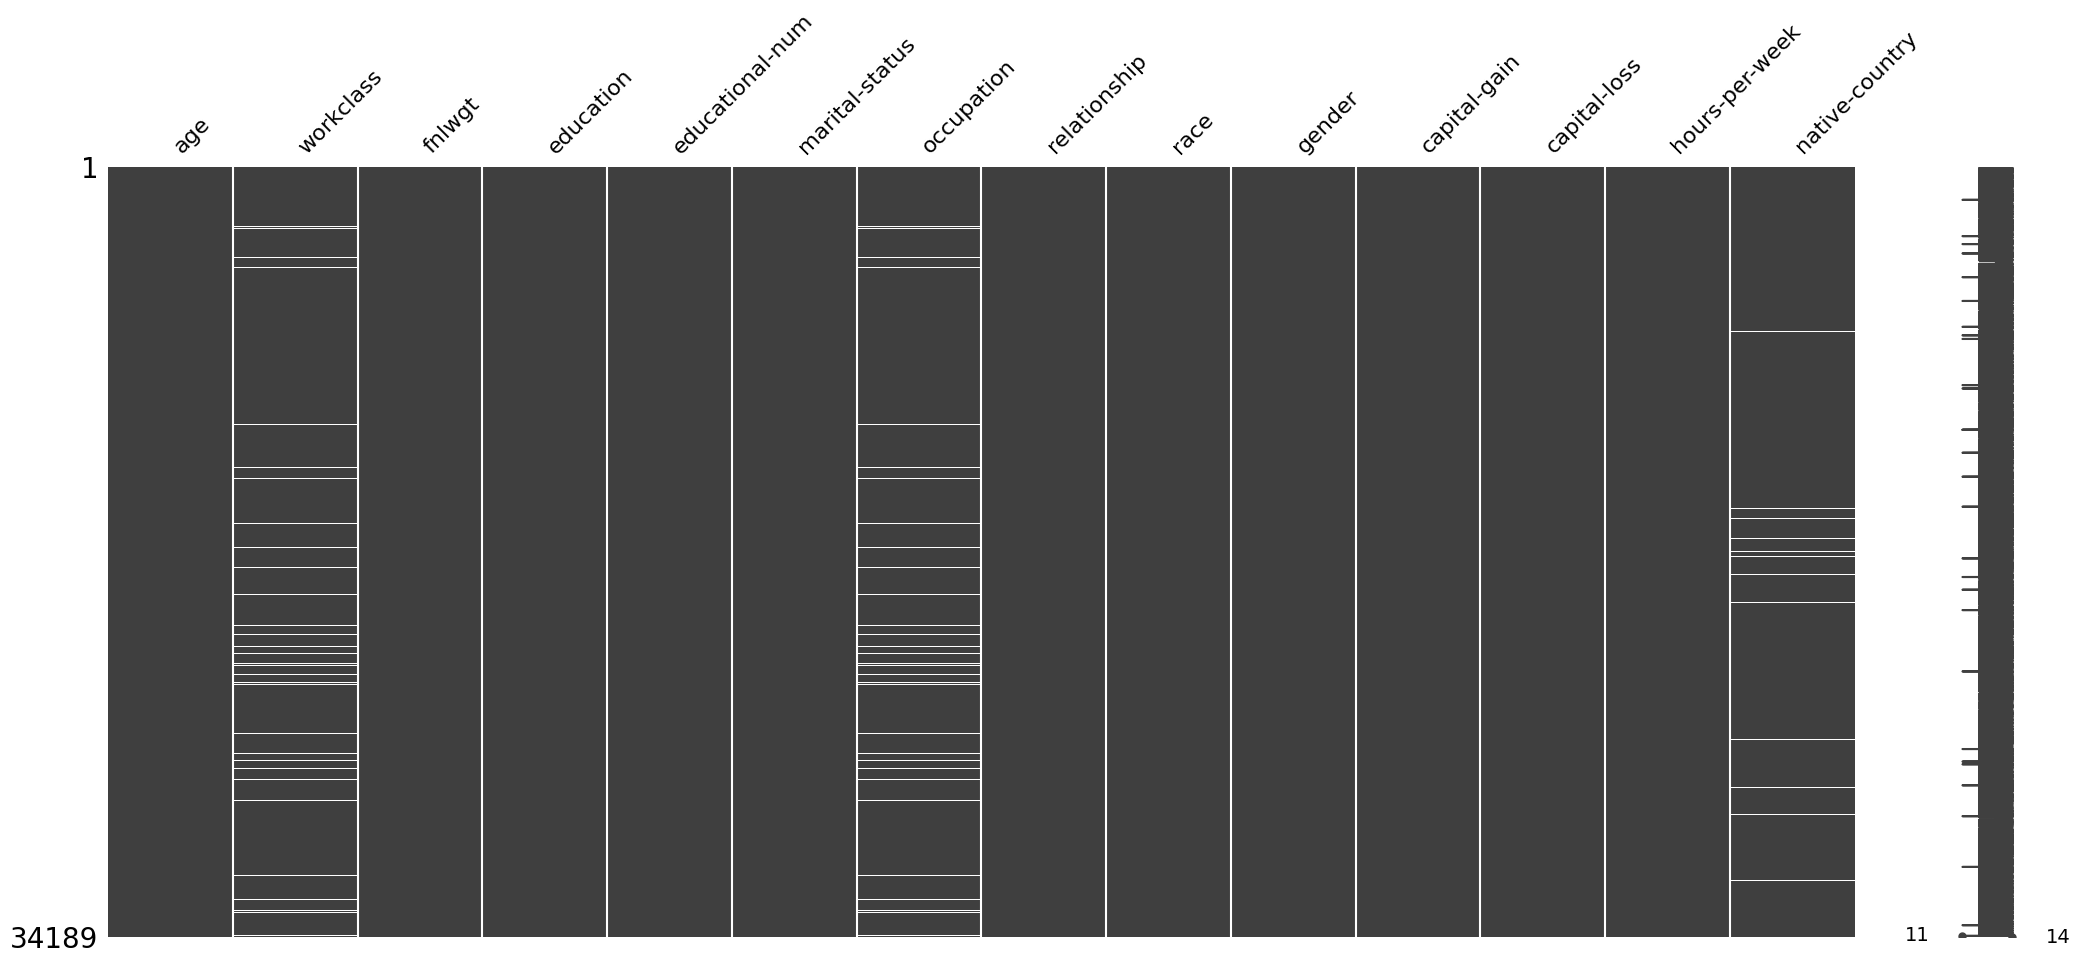

In [13]:
msno.matrix(X_train)

<Axes: >

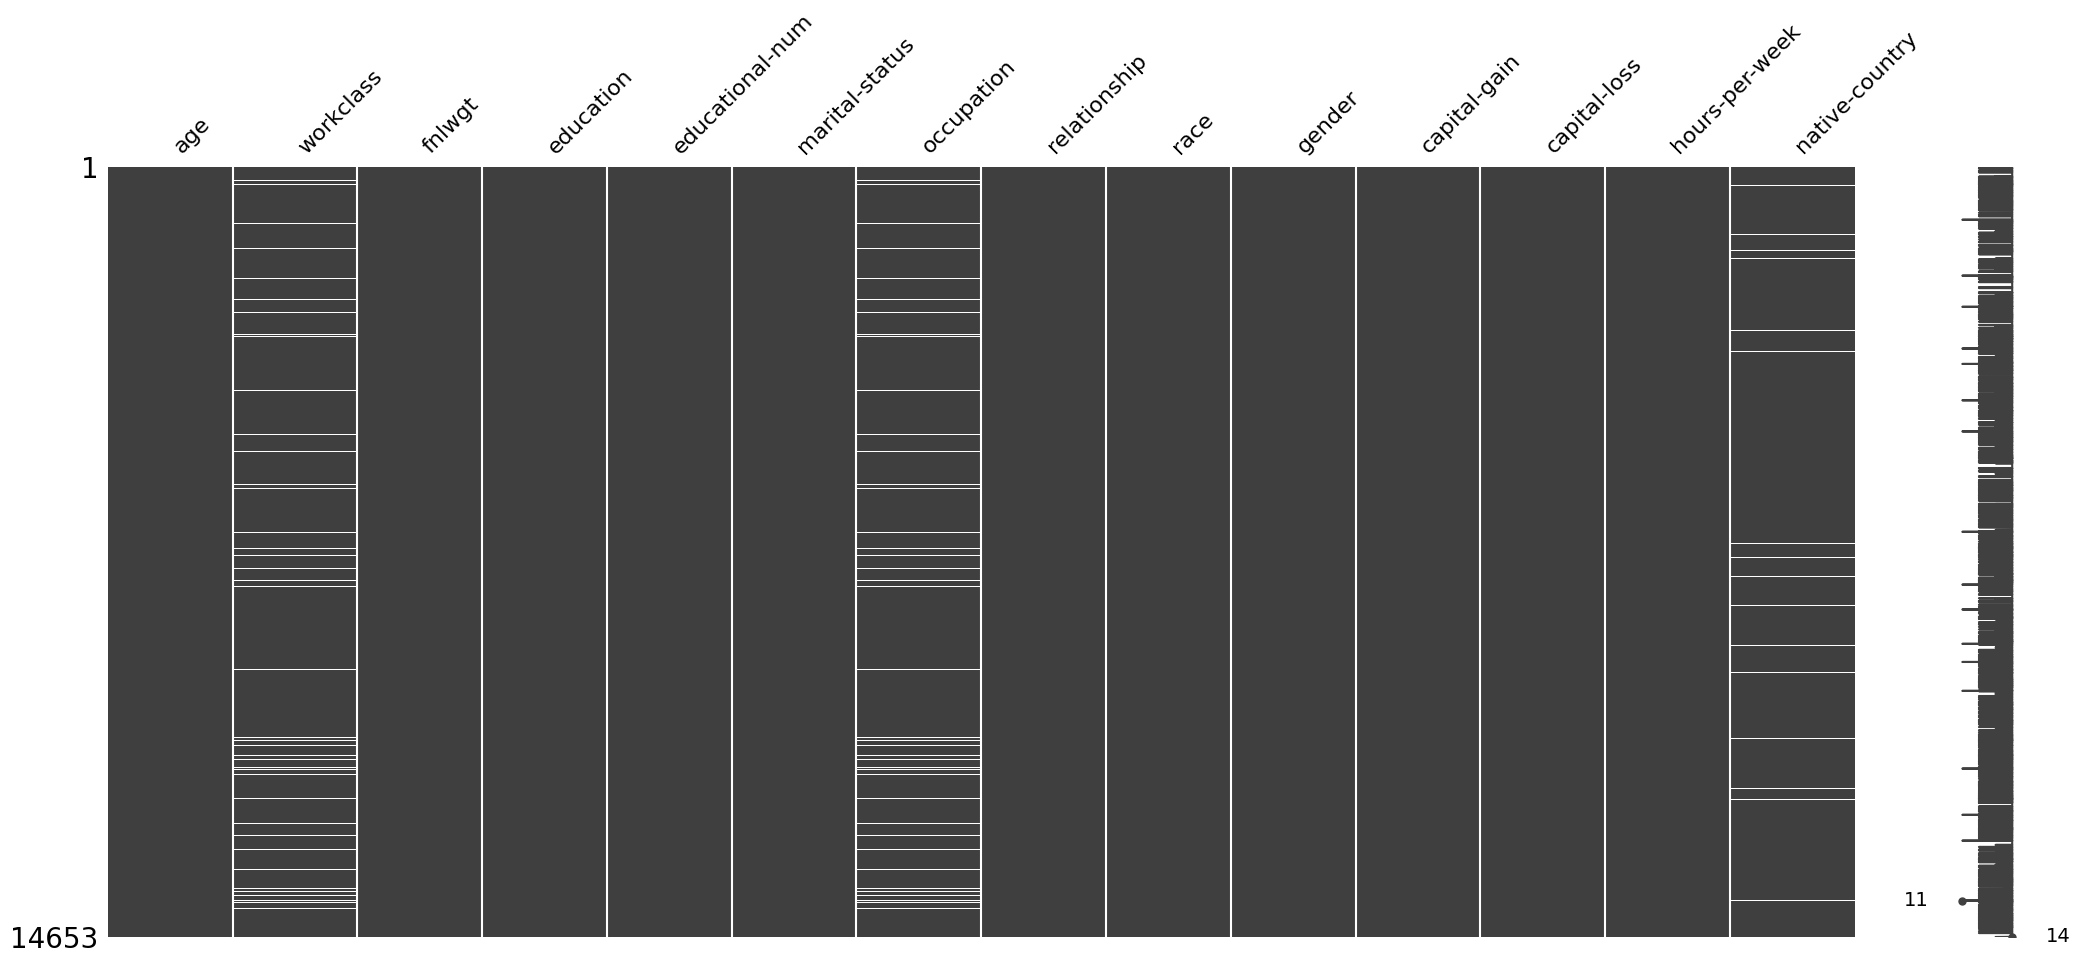

In [14]:
msno.matrix(X_test)

## Dropping columns with 30% or more missing values

In [15]:
percentage = 30
min_train = int(((100-percentage)/100)*X_train.shape[0])
min_test = int(((100-percentage)/100)*X_test.shape[0])

print(min_train, X_train.shape[0])
print(min_test, X_test.shape[0])

23932 34189
10257 14653


In [16]:
X_train.dropna(axis=1, thresh=min_train, inplace=True)
X_test.dropna(axis=1, thresh=min_test, inplace=True)

print(X_train.shape, X_test.shape)

(34189, 14) (14653, 14)


*No Columns was dropped as all the columns have more than 70% data*

## Fill up other data with mean of X_train

In [17]:
X_train.fillna(X_train.mean(),inplace=True)
print(X_train.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64


In [18]:
X_test.fillna(X_train.mean(), inplace=True)
print(X_test.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64


# Allign the y_train and y_test according to the indecies of X_train and X_test

In [19]:
y_train = y_train.loc[X_train.index]
y_test= y_test.loc[X_test.index]

# Balance the Dataset

In [20]:
y_train.describe()

count    34189.000000
mean         0.241803
std          0.428182
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income, dtype: float64

In [21]:
y_train.shape

(34189,)

In [22]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 34189 entries, 42392 to 15795
Series name: income
Non-Null Count  Dtype
--------------  -----
34189 non-null  int64
dtypes: int64(1)
memory usage: 534.2 KB


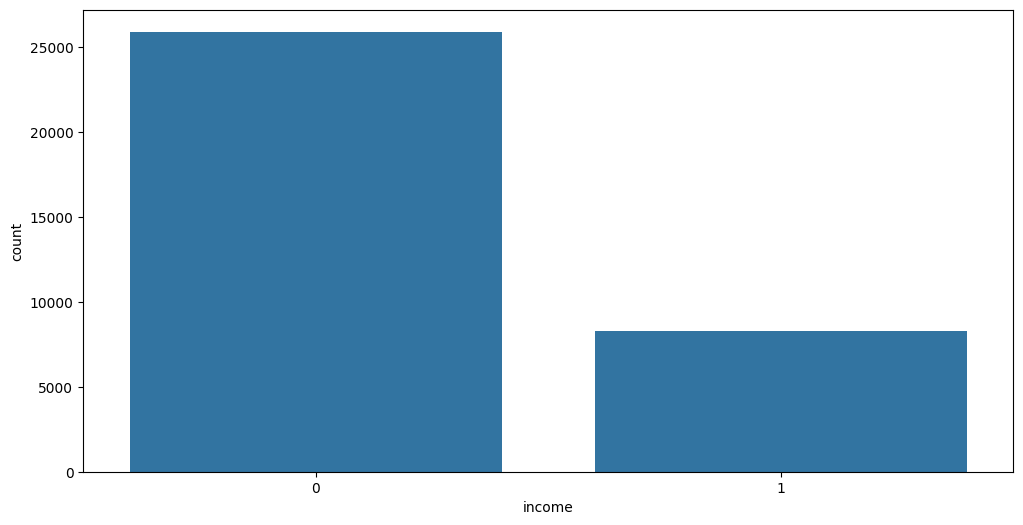

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x=y_train)
plt.show()

In [24]:
y_train.value_counts()

income
0    25922
1     8267
Name: count, dtype: int64

In [25]:
class_counts = Counter(y_train)

average_count = int(sum(class_counts.values()) / len(class_counts))

print(f"The average for classes: {average_count}")

The average for classes: 17094


In [26]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

smote = SMOTE(sampling_strategy={1: average_count}, random_state=42)
tomek = TomekLinks()

smote_tomek = SMOTETomek(sampling_strategy=1, smote=smote, tomek=tomek, random_state=42)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

rus = RandomUnderSampler(sampling_strategy={0: average_count})

X_train, y_train = rus.fit_resample(X_train, y_train)

print(f"Y main: {Counter(y_train)}")
print(f"Y resampled: {Counter(y_train)}")
print(f"Y balanced: {Counter(X_train)}")

Y main: Counter({0: 17094, 1: 17094})
Y resampled: Counter({0: 17094, 1: 17094})
Y balanced: Counter({'age': 1, 'workclass': 1, 'fnlwgt': 1, 'education': 1, 'educational-num': 1, 'marital-status': 1, 'occupation': 1, 'relationship': 1, 'race': 1, 'gender': 1, 'capital-gain': 1, 'capital-loss': 1, 'hours-per-week': 1, 'native-country': 1})


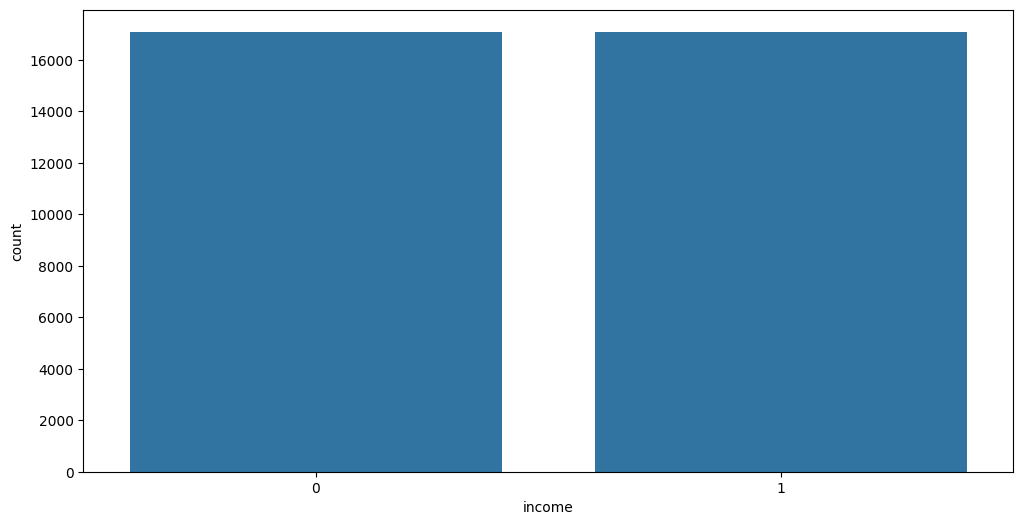

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x=y_train)
plt.show()

# Pearson's Correlation

<Axes: >

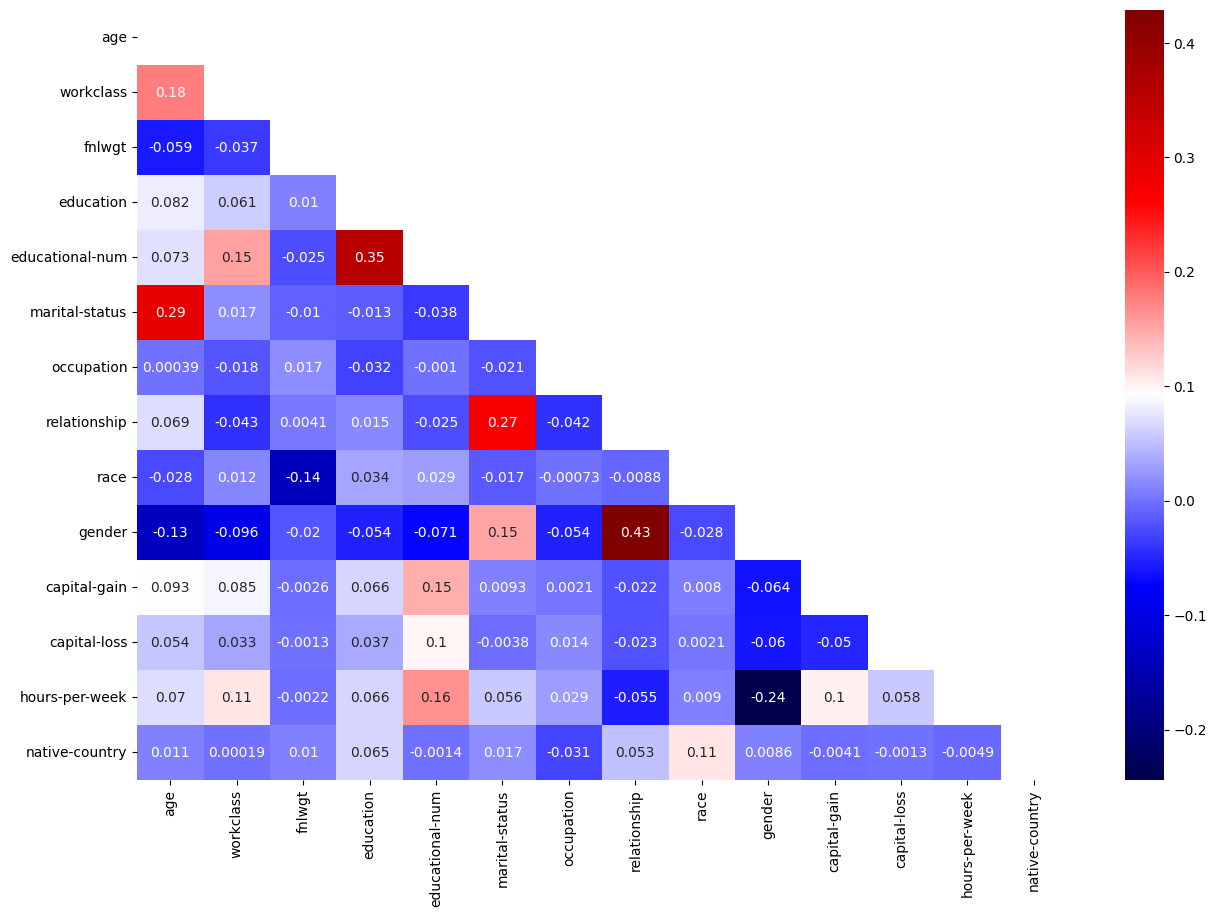

In [28]:
corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='seismic', mask=mask1)

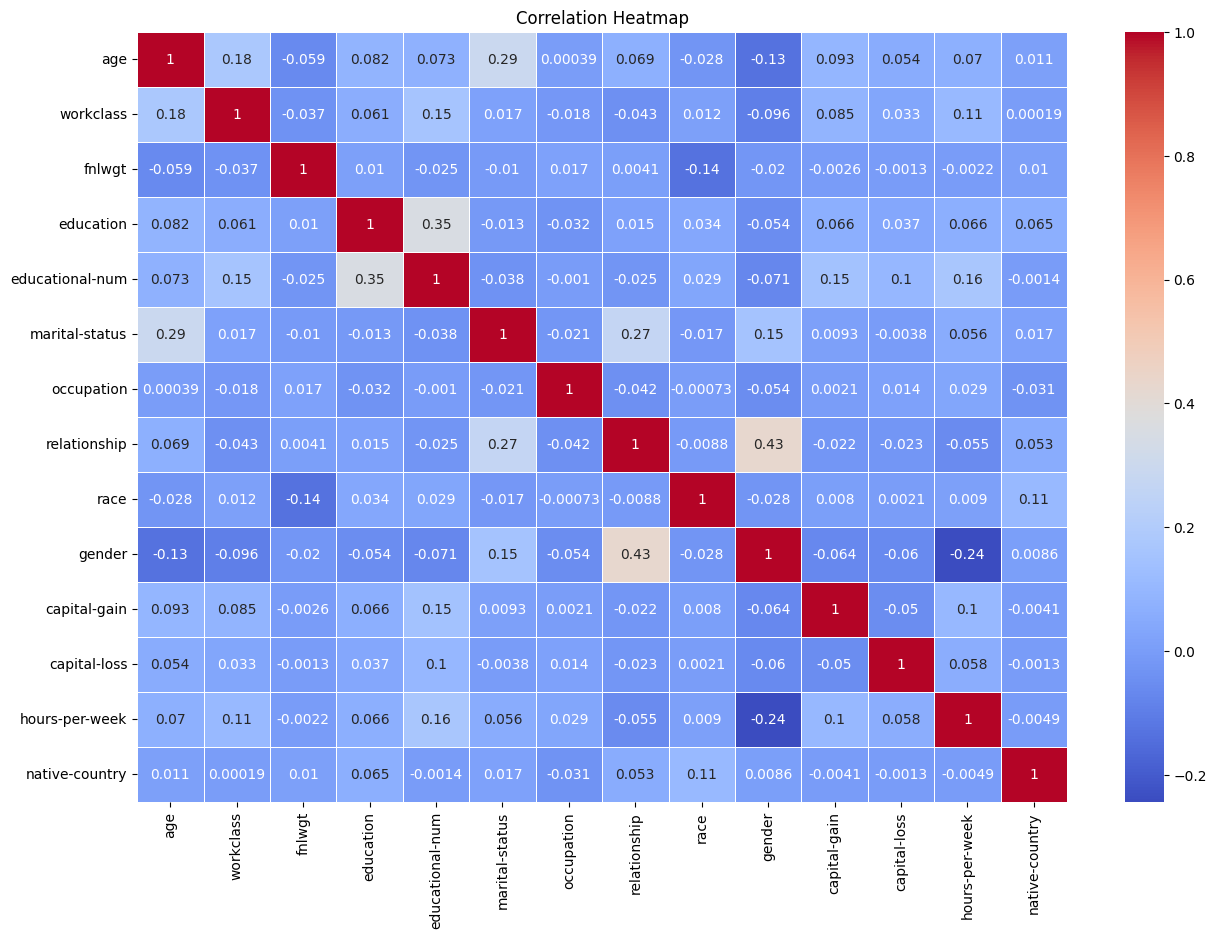

In [29]:
# correlation heatmap
plt.figure(figsize=(15,10))
correlation_matrix = X_train.corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Correlation Heatmap')
plt.show()

## High Correlation Removal

In [30]:
def high_correlation(dataset, threshold):
    col_corr = set() # set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [31]:
corr_features = high_correlation(X_train, 0.80) 
print(len(corr_features))
print(corr_features)

0
set()


*No Correlation is more than 80%*

# Scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_scaled = mm.fit_transform(X_train)

In [51]:
print(X_scaled)

[[0.10958904 0.14285714 0.19656679 ... 0.         0.39795918 0.        ]
 [0.09589041 0.         0.43746247 ... 0.         0.39795918 0.075     ]
 [0.1369863  0.42857143 0.35404758 ... 0.         0.31632653 0.        ]
 ...
 [0.39726027 0.43169241 0.12786713 ... 0.         0.40816327 0.        ]
 [0.42465753 0.30388078 0.18085882 ... 0.         0.53061224 0.36161813]
 [0.53424658 0.         0.09145871 ... 0.         0.39795918 0.        ]]


# RFECV Feature Selection

In [34]:
from sklearn.feature_selection import RFECV

## RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
select = RFECV(estimator=rfc)
select = select.fit(X_scaled, y_train)
print(select.ranking_)

[1 1 1 1 1 1 1 1 2 1 1 1 1 1]


In [36]:
features = np.array(X_train.columns)

mask = select.get_support()
best_features = features[mask]

print("All features: ", len(features))
print("All features: ", features, end='\n\n')
print("Best features: ", len(best_features))
print("Best features: ", best_features)

if len(features) != len(best_features):
    not_best_features = np.setdiff1d(features, best_features)
    print("\n\nFeatures in all features but not in best features: ", len(not_best_features))
    print("Features in all features but not in best features: ", not_best_features)

All features:  14
All features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']

Best features:  13
Best features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']


Features in all features but not in best features:  1
Features in all features but not in best features:  ['race']


## Logistic Regression

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
select = RFECV(estimator=lr)
select = select.fit(X_scaled, y_train)
print(select.ranking_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [38]:
features = np.array(X_train.columns)

mask = select.get_support()
best_features = features[mask]

print("All features: ", len(features))
print("All features: ", features, end='\n\n')
print("Best features: ", len(best_features))
print("Best features: ", best_features)

if len(features) != len(best_features):
    not_best_features = np.setdiff1d(features, best_features)
    print("\n\nFeatures in all features but not in best features: ", len(not_best_features))
    print("Features in all features but not in best features: ", not_best_features)

All features:  14
All features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']

Best features:  14
Best features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']


## Support Vector Machine

In [39]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
select = RFECV(estimator=svc)
select = select.fit(X_scaled, y_train)
print(select.ranking_)

[1 1 1 1 1 1 1 2 1 1 1 1 1 1]


In [40]:
features = np.array(X_train.columns)

mask = select.get_support()
best_features = features[mask]

print("All features: ", len(features))
print("All features: ", features, end='\n\n')
print("Best features: ", len(best_features))
print("Best features: ", best_features)

if len(features) != len(best_features):
    not_best_features = np.setdiff1d(features, best_features)
    print("\n\nFeatures in all features but not in best features: ", len(not_best_features))
    print("Features in all features but not in best features: ", not_best_features)

All features:  14
All features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']

Best features:  13
Best features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']


Features in all features but not in best features:  1
Features in all features but not in best features:  ['relationship']


## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
select = RFECV(estimator=dtc)
select = select.fit(X_scaled, y_train)
print(select.ranking_)

[1 1 1 1 1 1 1 1 2 3 1 1 1 1]


In [42]:
features = np.array(X_train.columns)

mask = select.get_support()
best_features = features[mask]

print("All features: ", len(features))
print("All features: ", features, end='\n\n\n')
print("Best features: ", len(best_features))
print("     features: ", best_features)

if len(features) != len(best_features):
    not_best_features = np.setdiff1d(features, best_features)
    print("\n\nFeatures in all features but not in best features: ", len(not_best_features))
    print("Features in all features but not in best features: ", not_best_features)

All features:  14
All features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']


Best features:  12
     features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']


Features in all features but not in best features:  2
Features in all features but not in best features:  ['gender' 'race']


## Lightgbm

In [43]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
select = RFECV(estimator=model)
select = select.fit(X_scaled, y_train)
print(select.ranking_)

[LightGBM] [Info] Number of positive: 13675, number of negative: 13675
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1736
[LightGBM] [Info] Number of data points in the train set: 27350, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 13675, number of negative: 13675
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1731
[LightGBM] [Info] Number of data points in the train set: 27350, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

In [44]:
features = np.array(X_train.columns)

mask = select.get_support()
best_features = features[mask]

print("All features: ", len(features))
print("All features: ", features, end='\n\n\n')
print("Best features: ", len(best_features))
print("Best features: ", best_features)

if len(features) != len(best_features):
    not_best_features = np.setdiff1d(features, best_features)
    print("\n\nFeatures in all features but not in best features: ", len(not_best_features))
    print("Features in all features but not in best features: ", not_best_features)

All features:  14
All features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']


Best features:  13
Best features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']


Features in all features but not in best features:  1
Features in all features but not in best features:  ['gender']


## Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
select = RFECV(estimator=gbc)
select = select.fit(X_scaled, y_train)
print(select.ranking_)

[1 1 2 1 1 1 1 1 4 1 1 1 1 3]


In [46]:
features = np.array(X_train.columns)

mask = select.get_support()
best_features = features[mask]

print("All features: ", len(features))
print("All features: ", features, end='\n\n\n')
print("Best features: ", len(best_features))
print("Best features: ", best_features)

if len(features) != len(best_features):
    not_best_features = np.setdiff1d(features, best_features)
    print("\n\nFeatures in all features but not in best features: ", len(not_best_features))
    print("Features in all features but not in best features: ", not_best_features)

All features:  14
All features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']


Best features:  11
Best features:  ['age' 'workclass' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week']


Features in all features but not in best features:  3
Features in all features but not in best features:  ['fnlwgt' 'native-country' 'race']


## ADA Boost

In [47]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
select = RFECV(estimator=adb)
select = select.fit(X_scaled, y_train)
print(select.ranking_)

e:\codes\data-analysis\adult-income-prediction\env-adult-income-prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
e:\codes\data-analysis\adult-income-prediction\env-adult-income-prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
e:\codes\data-analysis\adult-income-prediction\env-adult-income-prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
e:\codes\data-analysis\adult-income-prediction\env-adult-income-prediction\Lib\site-packages\sklearn\ensemble

[1 1 3 1 1 1 1 1 2 1 1 1 1 1]


In [48]:
features = np.array(X_train.columns)

mask = select.get_support()
best_features = features[mask]

print("All features: ", len(features))
print("All features: ", features, end='\n\n\n')
print("Best features: ", len(best_features))
print("Best features: ", best_features)

if len(features) != len(best_features):
    not_best_features = np.setdiff1d(features, best_features)
    print("\n\nFeatures in all features but not in best features: ", len(not_best_features))
    print("Features in all features but not in best features: ", not_best_features)

All features:  14
All features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']


Best features:  12
Best features:  ['age' 'workclass' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']


Features in all features but not in best features:  2
Features in all features but not in best features:  ['fnlwgt' 'race']


## XG Boost

In [49]:
import xgboost as xgb
model = xgb.XGBClassifier()
select = RFECV(estimator=model)
select = select.fit(X_scaled, y_train)
print(select.ranking_)

[1 1 2 1 1 1 1 1 1 1 1 1 1 1]


In [50]:
features = np.array(X_train.columns)

mask = select.get_support()
best_features = features[mask]

print("All features: ", len(features))
print("All features: ", features, end='\n\n\n')
print("Best features: ", len(best_features))
print("Best features: ", best_features)

if len(features) != len(best_features):
    not_best_features = np.setdiff1d(features, best_features)
    print("\n\nFeatures in all features but not in best features: ", len(not_best_features))
    print("Features in all features but not in best features: ", not_best_features)

All features:  14
All features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']


Best features:  13
Best features:  ['age' 'workclass' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']


Features in all features but not in best features:  1
Features in all features but not in best features:  ['fnlwgt']
